## Leakage Simulation and Detection

### Initialize EPANET Python Toolkit (EPyT)

You should always begin with this command to import the toolkit.

[EPyT](https://github.com/OpenWaterAnalytics/EPyT) is available on [PyPI](https://pypi.org/project/epyt/) and can be installed via `pip install epyt`. To upgrade to the latest version if it's already installed, use `pip install --upgrade epyt`.

In [219]:
%pip install epyt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [220]:
from epyt import epanet
import tempfile
import requests
import os

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<img src="https://github.com/WaterFutures/EPyT-and-EPyT-Flow-Tutorial/blob/main/icons/large_leakage.png?raw=1" alt="Large Leakage" style="display: inline-block; width: 50%; height: 50%;">
<img src="https://github.com/WaterFutures/EPyT-and-EPyT-Flow-Tutorial/blob/main/icons/fire-fighting.png?raw=1" alt="Fire-Fighting" style="display: inline-block; width: 50%; height: 50%;">

### How pressure changes during large leakages and fire-fighting

When flow is increased within the network, e.g., due to fire-fighting, the pressure changes near that location. Investigate this change, at `node '32'.

In [221]:
def download_file(url, file_path):
    """
    Downloads a file from the given URL and saves it to the specified file path.

    Parameters:
    url (str): The URL to download the file from.
    file_path (str): The path where the downloaded file should be saved.

    Returns:
    str: A message indicating the result of the download.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check if the request was successful
        with open(file_path, 'wb') as file:
            file.write(response.content)
        return f"File downloaded and saved as {file_path}"
    except requests.exceptions.HTTPError as err:
        return f"HTTP error occurred: {err}"
    except Exception as err:
        return f"An error occurred: {err}"

# Download Net1.inp
url = "https://raw.githubusercontent.com/WaterFutures/EPyT-and-EPyT-Flow-Tutorial/main/data/Net1.inp"
tmpdirpath = tempfile.gettempdir()
inpname = os.path.join(tmpdirpath, "Net1.inp")
result = download_file(url, inpname)
print(result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


File downloaded and saved as /tmp/Net1.inp


In [222]:
G = epanet(inpname)

EPANET version 20200 loaded (EPyT version v1.1.9 - Last Update: 24/06/2024).
Input File Net1.inp loaded successfully.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


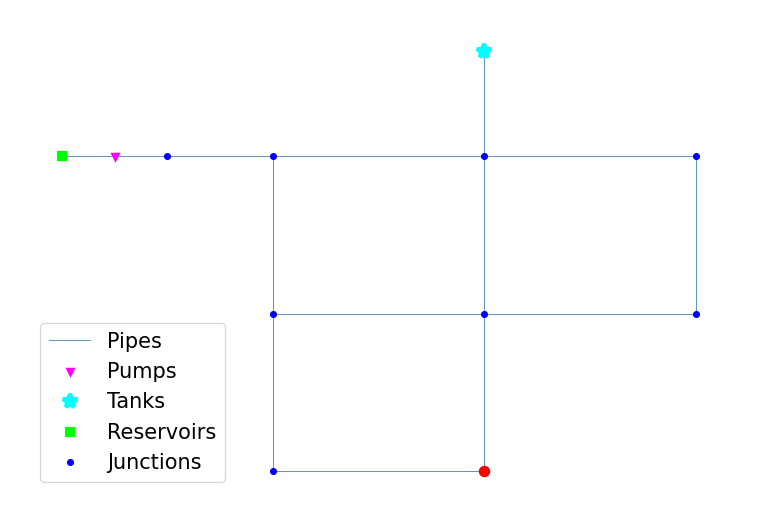

In [223]:
nodeID = '32'
G.plot(highlightnode=nodeID)
G.plot_close()

#### During fire-fighting, the base demand may increase up to x5. Will there be sufficient pressure?

In [224]:
idx = G.getNodeIndex(nodeID)
G.printv(idx)

idx = 9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [225]:
bd = G.getNodeBaseDemands(idx)[1]
G.printv(bd)

bd = [100.]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [226]:
# Demand multiplicator
demand_multi = 8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
import numpy as np
# Create the different demands
d32 = bd * np.arange(1, demand_multi + 1)
G.printv(d32)
help(np.arange)

d32 = [100. 200. 300. 400. 500. 600. 700. 800.]
Help on built-in function arange in module numpy:

arange(...)
    arange([start,] stop[, step,], dtype=None, *, like=None)
    
    Return evenly spaced values within a given interval.
    
    ``arange`` can be called with a varying number of positional arguments:
    
    * ``arange(stop)``: Values are generated within the half-open interval
      ``[0, stop)`` (in other words, the interval including `start` but
      excluding `stop`).
    * ``arange(start, stop)``: Values are generated within the half-open
      interval ``[start, stop)``.
    * ``arange(start, stop, step)`` Values are generated within the half-open
      interval ``[start, stop)``, with spacing between values given by
      ``step``.
    
    For integer arguments the function is roughly equivalent to the Python
    built-in :py:class:`range`, but returns an ndarray rather than a ``range``
    instance.
    
    When using a non-integer step, such as 0.1, it is ofte

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [228]:
# Initialize variable
p32min = np.zeros(len(d32))
for i, demand_value in enumerate(d32):
    G.setNodeBaseDemands(idx, demand_value)
    py_idx = idx - 1
    p32 = G.getComputedHydraulicTimeSeries().Pressure[:, py_idx]
    p32min[i] = np.min(p32)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/epyt/epanet.py:14320: UserWarning: WARNING: System has negative pressures.
  warnings.warn(errmssg.value.decode())
/usr/local/lib/python3.10/dist-packages/epyt/epanet.py:14320: UserWarning: WARNING: System has negative pressures.
  warnings.warn(errmssg.value.decode())
/usr/local/lib/python3.10/dist-packages/epyt/epanet.py:14320: UserWarning: WARNING: System has negative pressures.
  warnings.warn(errmssg.value.decode())
/usr/local/lib/python3.10/dist-packages/epyt/epanet.py:14320: UserWarning: WARNING: System has negative pressures.
  warnings.warn(errmssg.value.decode())
/usr/local/lib/python3.10

#### Plot demand vs pressure

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


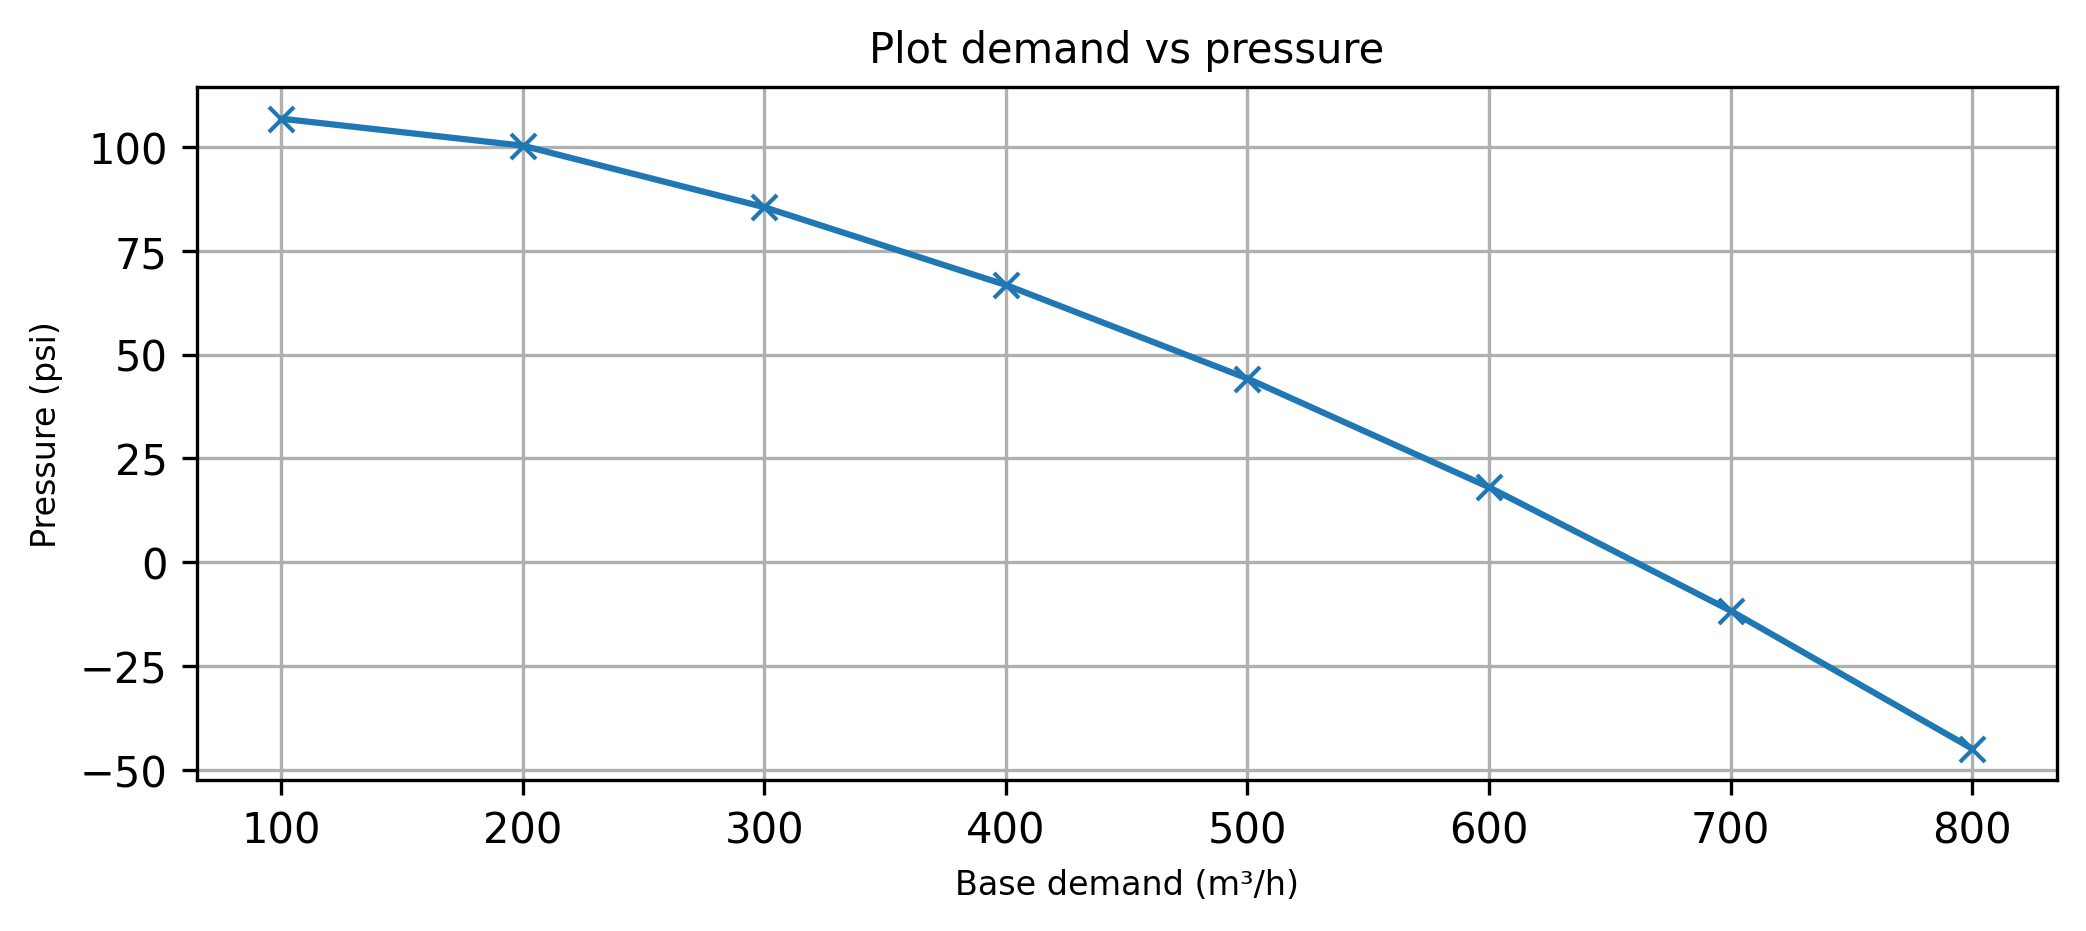

In [229]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 3))
fig.set_figwidth(8)
ax.plot(d32, p32min, 'x-')
ax.grid(True)
ax.set_title("Plot demand vs pressure", fontsize=10)
ax.set_xlabel(f"Base demand (m\u00B3/h)", fontsize=8)
ax.set_ylabel("Pressure (psi)", fontsize=8)
plt.show()

##### How about those negative pressures?

### Pressure Driven Simulations

##### When the pressure is low, it should approximate zero. This is not the default mode of operation in EPANET. However, it's easy to set it up:

In [230]:
type = 'PDA'
pmin = 0
preq = 0.1
pexp = 0.5
G.setDemandModel(type, pmin, preq, pexp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's try this again

In [231]:
# Demand multiplicator
demand_multi = 10

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [232]:
# Create the different threads
d32 = bd * np.arange(1, demand_multi + 1)
G.printv(d32)

d32 = [ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


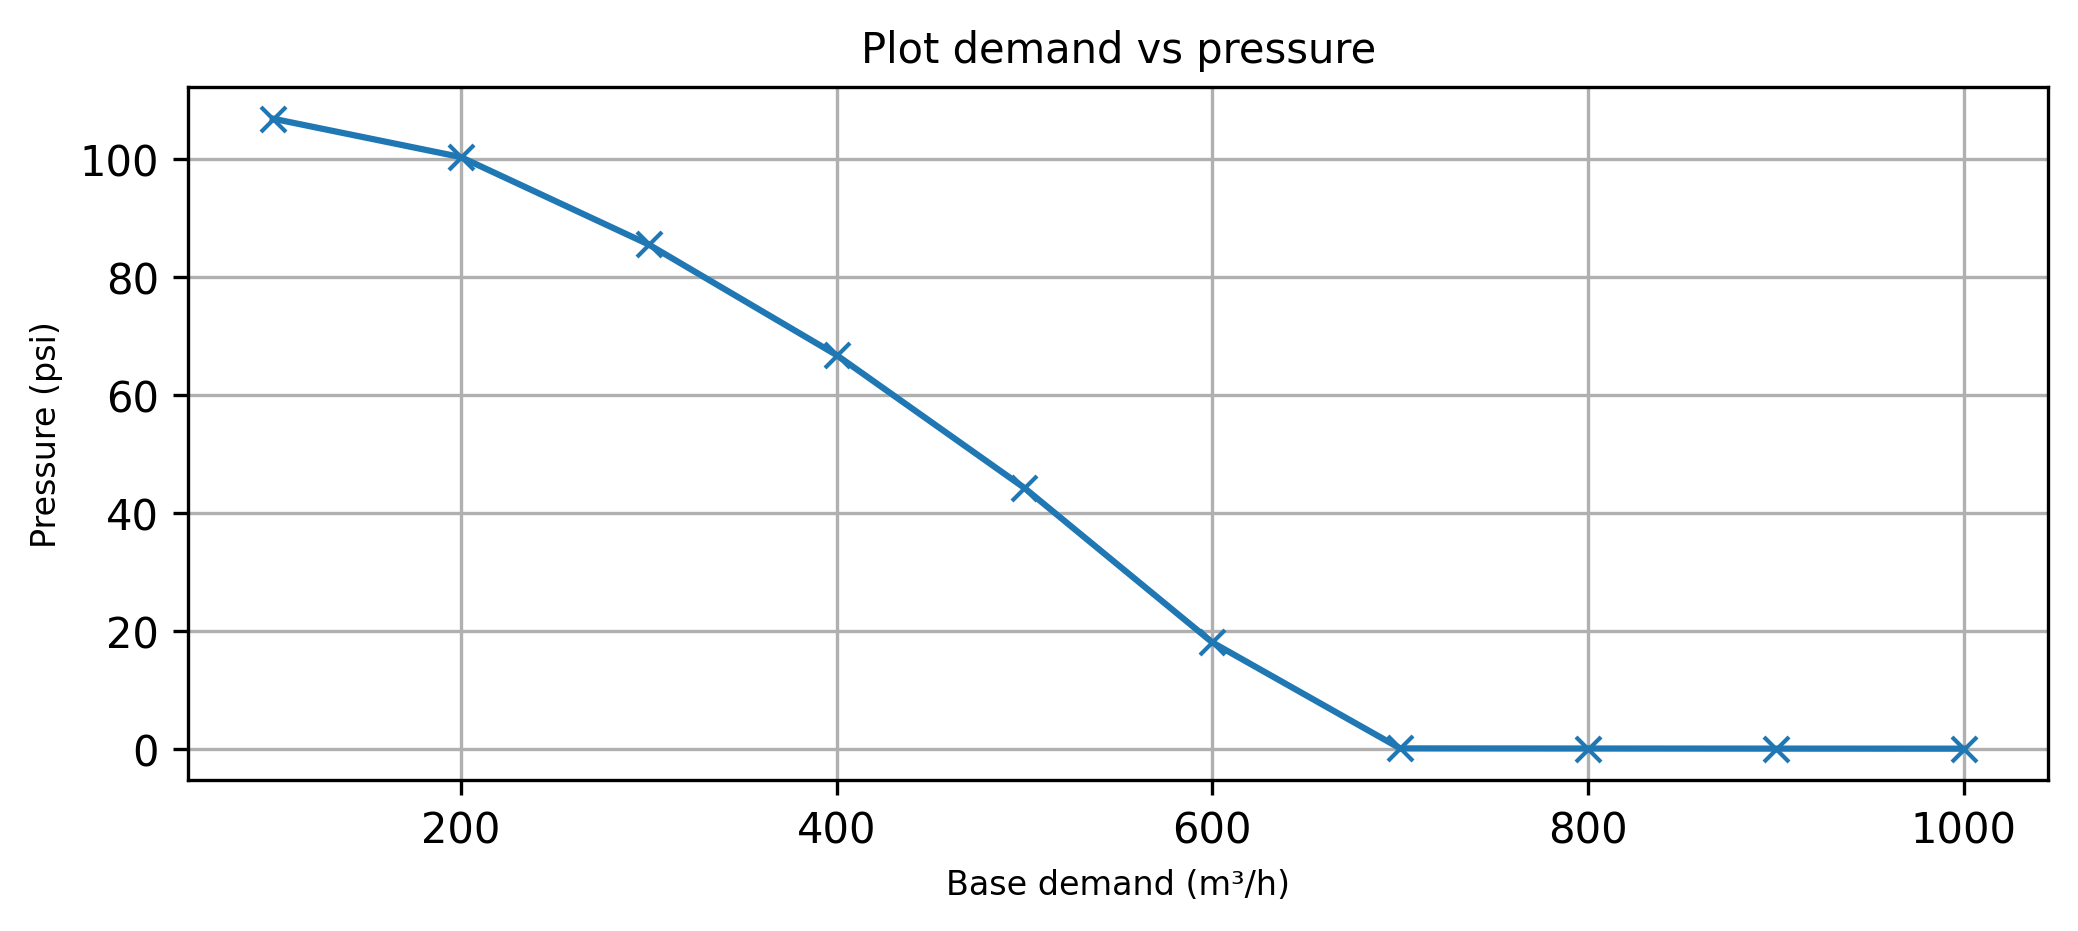

In [233]:
# Initialize variable
p32min = np.zeros(len(d32))

for i, demand_value in enumerate(d32):
    G.setNodeBaseDemands(idx, demand_value)
    p32 = G.getComputedHydraulicTimeSeries().Pressure[:, idx-1]
    p32min[i] = np.min(p32)

# Plot
fig, ax = plt.subplots(figsize=(4, 3))
fig.set_figwidth(8)
ax.plot(d32, p32min, 'x-')
ax.grid(True)
ax.set_title("Plot demand vs pressure", fontsize=10)
ax.set_xlabel(f"Base demand (m\u00B3/h)", fontsize=8)
ax.set_ylabel("Pressure (psi)", fontsize=8)
plt.show()

In [234]:
G.unload()

Close toolkit for the input file "Net1". EPANET Toolkit is unloaded.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Leakage Simulations
#### Load network amd set simulation duration and hydraulic step

In [235]:
# Download Hanoi_pat input file
url = "https://raw.githubusercontent.com/WaterFutures/EPyT-and-EPyT-Flow-Tutorial/main/data/Hanoi_pat.inp"
inpname = os.path.join(tmpdirpath, "Hanoi_pat.inp")
result = download_file(url, inpname)
print(result)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


File downloaded and saved as /tmp/Hanoi_pat.inp


In [236]:
d=epanet(inpname)

d.setTimeSimulationDuration(7*24*60*60)
d.setTimeHydraulicStep(300)

EPANET version 20200 loaded (EPyT version v1.1.9 - Last Update: 24/06/2024).
Input File Hanoi_pat.inp loaded successfully.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Simulate without leak

In [237]:
sim_leak_free = d.getComputedHydraulicTimeSeries()
print(d.getAllAttributes(sim_leak_free))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('Time', array([     0,    300,    600, ..., 604200, 604500, 604800])), ('Pressure', array([[67.27574921, 67.17794037, 67.11522675, ..., 67.36548615,
        67.31647491,  0.        ],
       [67.27574921, 67.17794037, 67.11522675, ..., 67.36548615,
        67.31647491,  0.        ],
       [67.27574921, 67.17794037, 67.11522675, ..., 67.36548615,
        67.31647491,  0.        ],
       ...,
       [66.15447998, 66.01503754, 65.93110657, ..., 66.28556824,
        66.21385956,  0.        ],
       [66.15447998, 66.01503754, 65.93110657, ..., 66.28556824,
        66.21385956,  0.        ],
       [67.27574921, 67.17794037, 67.11522675, ..., 67.36548615,
        67.31647491,  0.        ]])), ('Demand', array([[   70.35491943,    84.78087616,   100.42221069, ...,
           92.85502625,    85.87767029, -3397.45532227],
       [   70.35491943,    84.78087616,   100.42221069, ...,
           92.85502625,    85.87767029, -3397.45532227],
       [   70.35491943,    84.78087616,   100.422210

##### Get inflow without leak and create measurements by inserting random noise

In [238]:
res_ind = d.getNodeReservoirIndex()
res_link = [np.where(d.NodesConnectingLinksIndex[:, 0] == idx)[0][0] for idx in res_ind]
Inflow1 = sim_leak_free.Flow[:, res_link] # Inflow
eta = np.random.rand(len(Inflow1),1) * np.mean(Inflow1) * 0.0001
y1 = Inflow1 * (1 + eta) # Measured inflow
print(y1)

[[4247.96810471]
 [3921.69192389]
 [4970.95686486]
 ...
 [5973.33908622]
 [5813.73731993]
 [3941.69721608]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Simulate leakage

In [239]:
leak_node_id = '19'
leak_node = d.getNodeIndex(leak_node_id)
leak_emit = 20  # Random leak emitter coefficient [2 20]
emit = d.getNodeEmitterCoeff()
emit = np.zeros_like(emit)
emit[leak_node-1] = leak_emit  # Set emitter coefficient (leakage) value
d.setNodeEmitterCoeff(emit)
sim_leak = d.getComputedHydraulicTimeSeries()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Get inflow with leak and create measurements by inserting random noise

In [240]:
Inflow2 = sim_leak.Flow[:, res_link]  # inflow
Inflow2[:3*288] = Inflow1[:3*288][:]  # change leak start time
eta = np.random.rand(len(Inflow2),1) * np.mean(Inflow1) * 0.0001
y2 = Inflow2 * (1 + eta)  # measured inflow

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Plots - Compare inflow in both scenarios

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


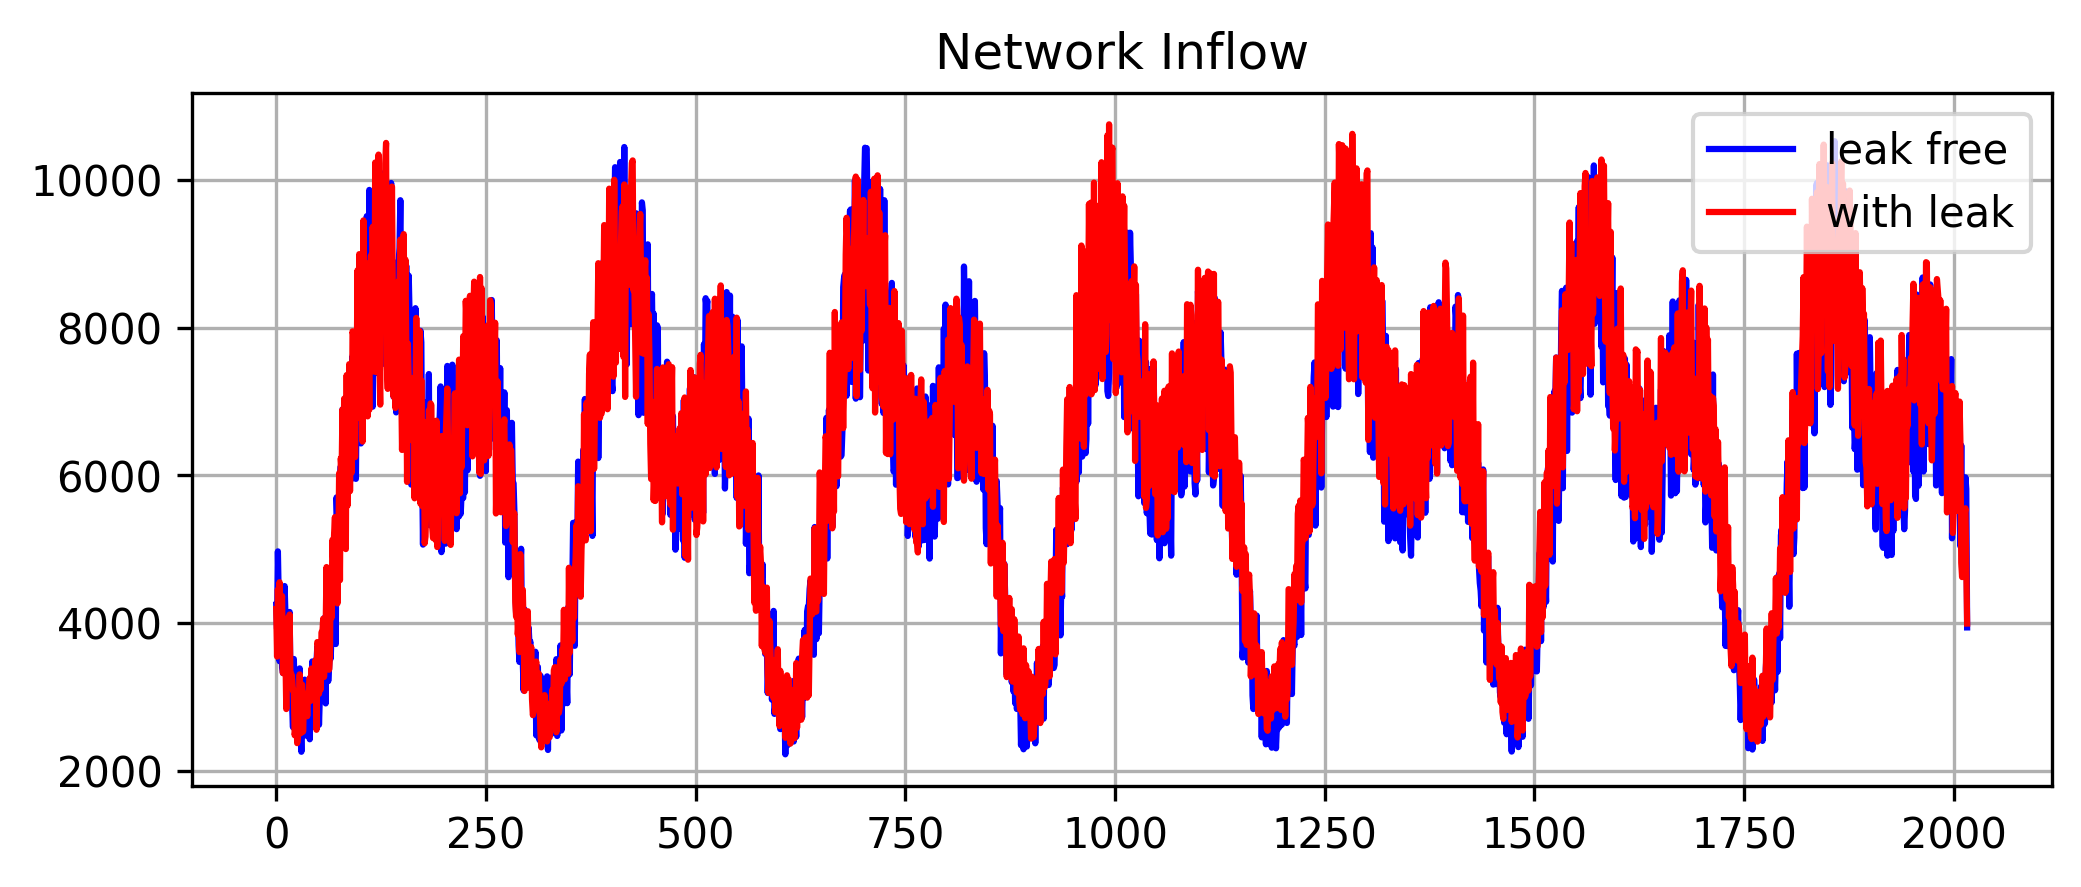

In [241]:
fig, ax = plt.subplots(figsize=(4, 3))
fig.set_figwidth(8)
plt.plot(y1, color='blue', label='leak free')
plt.grid(True)
plt.plot(y2, color='red', label='with leak')
plt.legend(loc='upper right')
plt.title('Network Inflow')
plt.show()

##### Plot leakage location

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


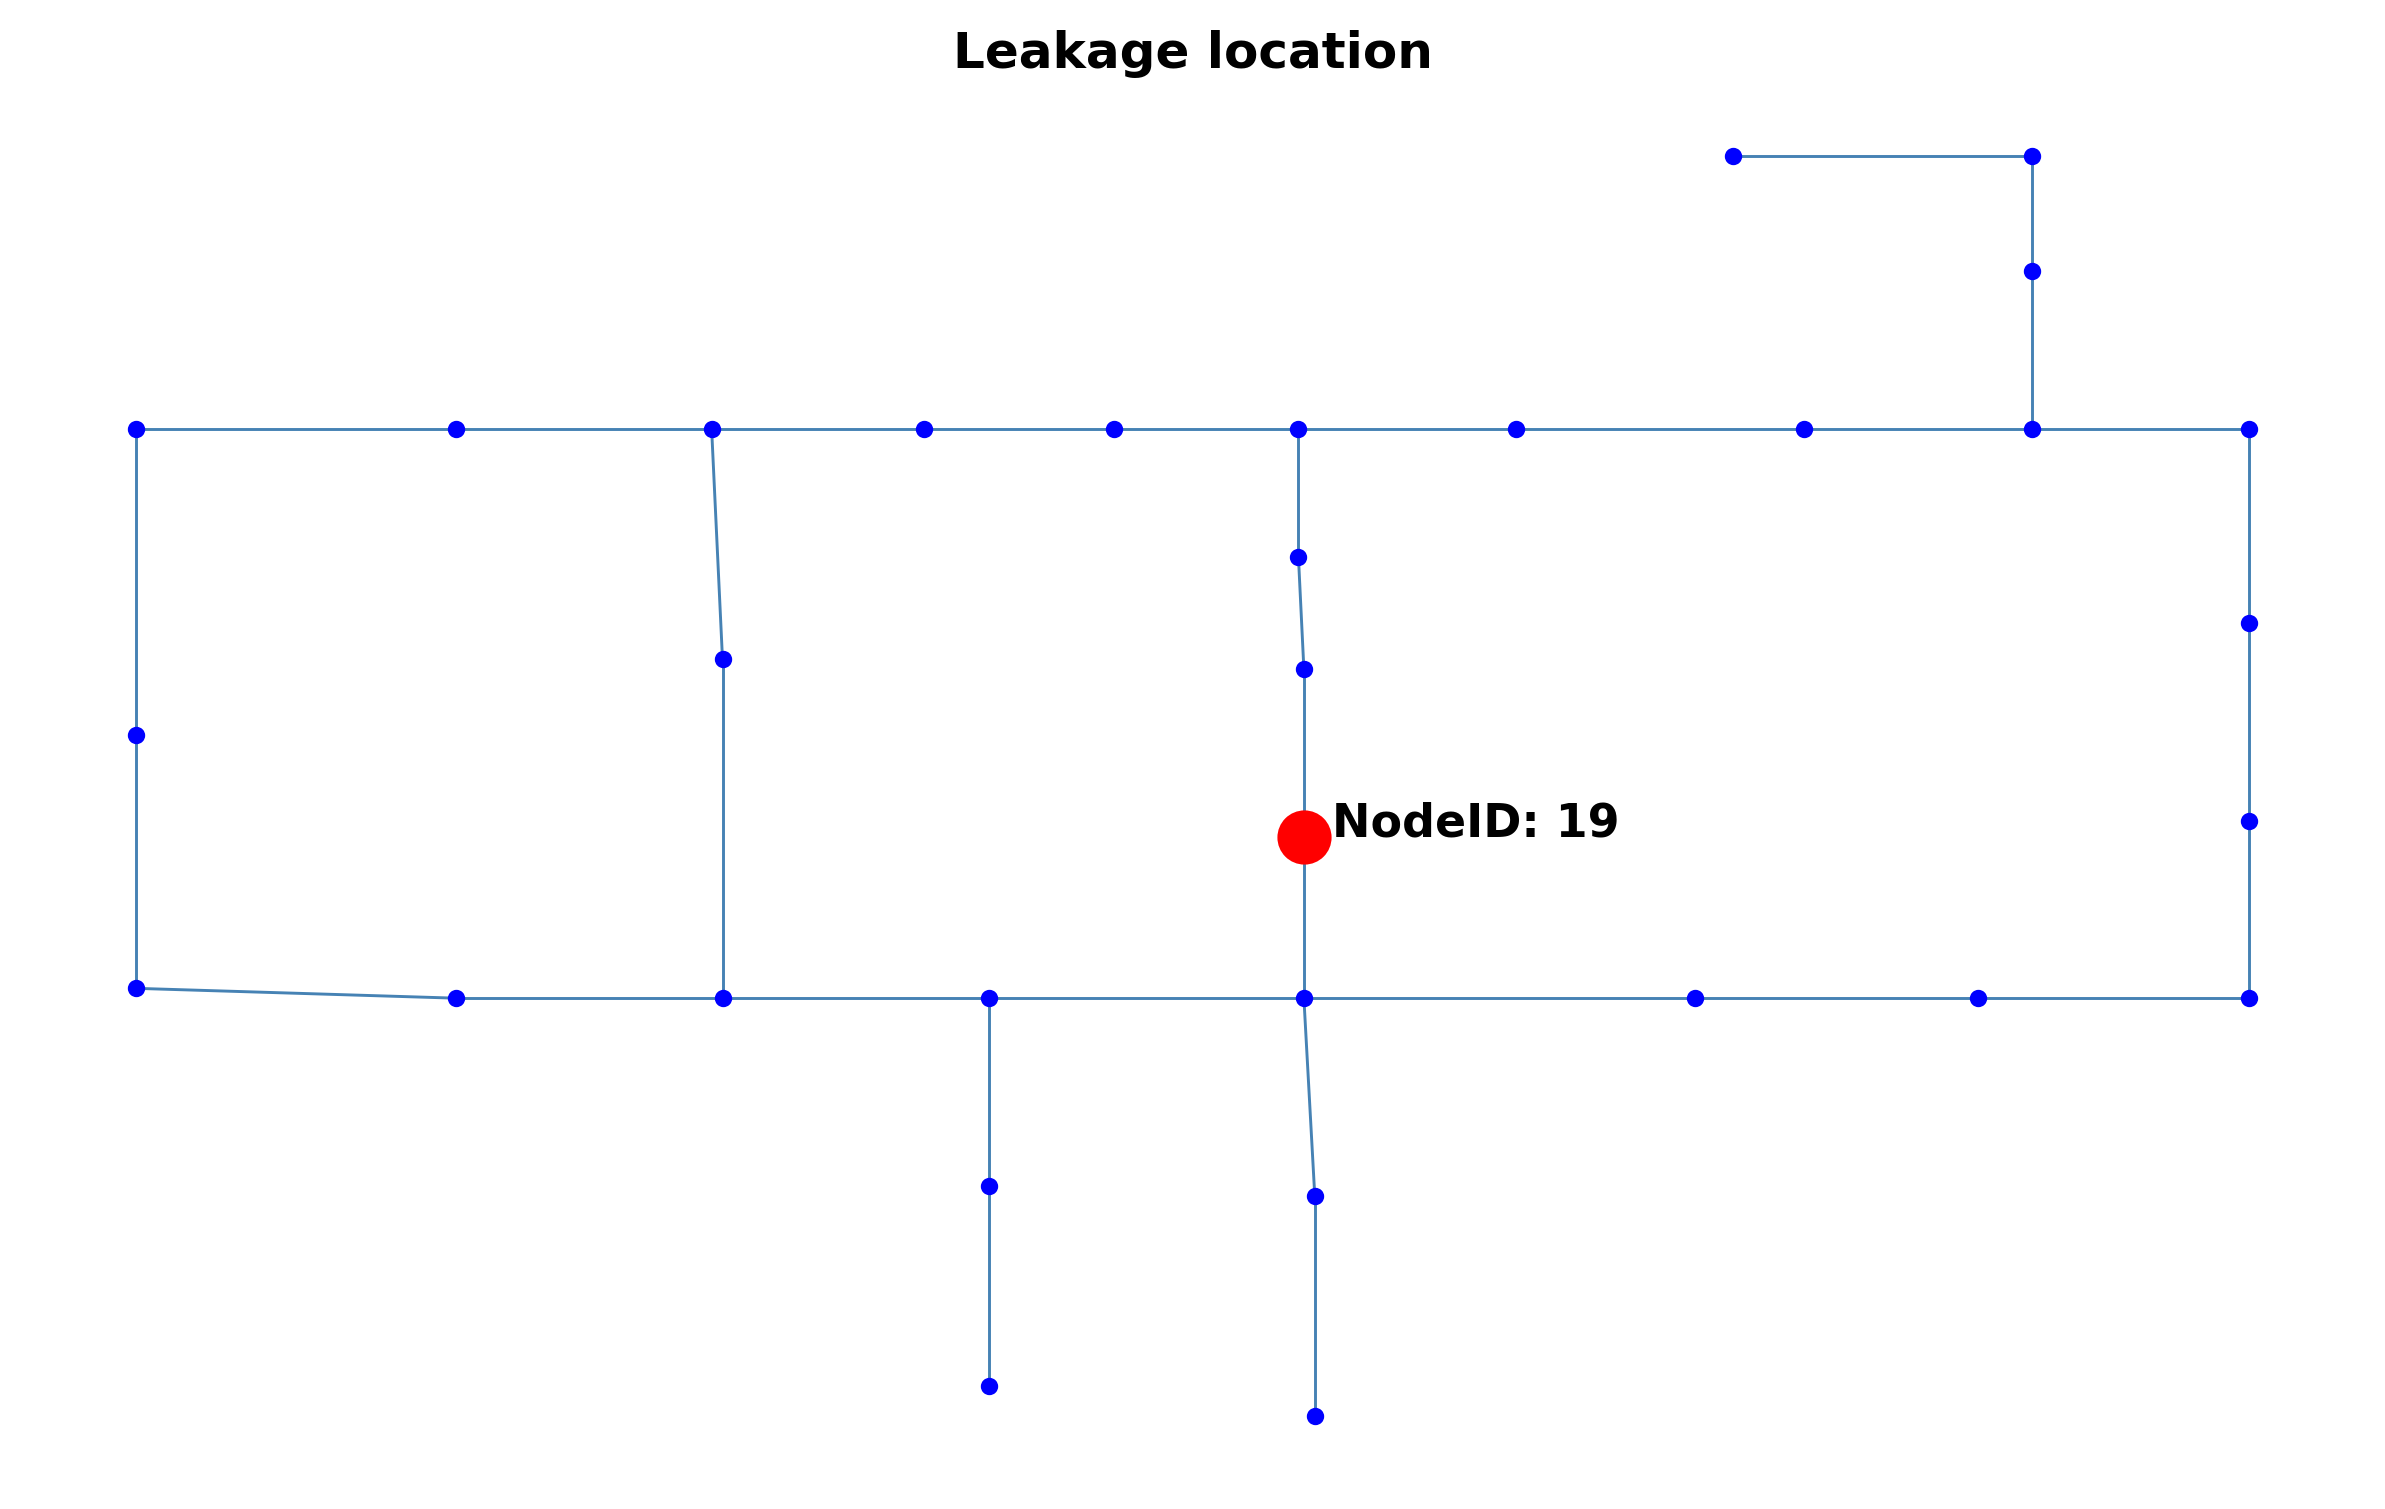

In [242]:
# Custom function to plot the network (alternative to G.plot())
def custom_plot(coor):
    # Note: Does not used vertices
    x_nodes = list(coor['x'].values())
    y_nodes = list(coor['y'].values())
    # Get links connecting nodes
    links = d.getNodesConnectingLinksIndex()
    # Plot the network manually
    fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
    for link in links:
        x_coords = [coor['x'][link[0]], coor['x'][link[1]]]
        y_coords = [coor['y'][link[0]], coor['y'][link[1]]]
        ax.plot(x_coords, y_coords, color='steelblue', linewidth=0.7)
    ax.axis('off')
    # Plot nodes
    ax.scatter(x_nodes, y_nodes, color='blue', s=10, zorder=5)
    return ax

# Get node coordinates
coor = d.getNodeCoordinates()
# Custom plot - network plot
ax = custom_plot(coor)

# Add plot point for the leak node
x_leak = coor['x'][leak_node]
y_leak = coor['y'][leak_node]

# Plot the leak node with a higher zorder
ax.plot(x_leak, y_leak, 'o', color='r', markersize=12, zorder=10)
ax.text(x_leak + 60, y_leak, 'NodeID: ' + leak_node_id, color='black', fontweight='bold', fontsize=11, zorder=10)

# Set the title and show the plot
ax.set_title('Leakage location', fontweight='bold')
plt.show()

### Leakage Detection
#### Minimum Night Flow Analysis

<img src="https://github.com/WaterFutures/EPyT-and-EPyT-Flow-Tutorial/blob/main/icons/leakage_detection.png?raw=1" alt="Leakage Detection" style="width: 60%; height: 60%;">

- Basic idea is that each night the uncertainty is low
- Demand is low
- Pressure is high
- Easier to detect leakages

In [243]:
# Compute the minimum flow for each day
Y = np.reshape(y2[1:], (7, 288))
print('Y = ', Y.shape)
d.printv(Y)

Y =  (7, 288)
Y = [[3546.52464522 4456.46268049 3906.37107123 ... 4085.07195783
  4634.94410497 3843.69816833]
 [4017.91628475 3607.92337056 4934.36872517 ... 5966.00007346
  4497.6917587  4852.95962991]
 [5036.30279494 4800.00916478 3687.47290724 ... 4687.77014664
  4720.94343618 3976.80399203]
 ...
 [4525.7711355  5026.59007423 3755.20231295 ... 5402.20532354
  6056.59848075 4107.68942567]
 [4812.32424229 4174.51510118 4786.49152049 ... 5140.29646353
  6108.18517914 4595.42594406]
 [4332.49721522 4315.28136374 5300.92665033 ... 5553.99326958
  4752.5474435  3994.02952504]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [244]:
MF = np.min(Y, axis=1)
d.printv(MF)

MF = [2375.09882112 2317.74746457 2368.2925976  2436.16929326 2542.86918916
 2451.69904511 2395.55936857]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of change points: 6


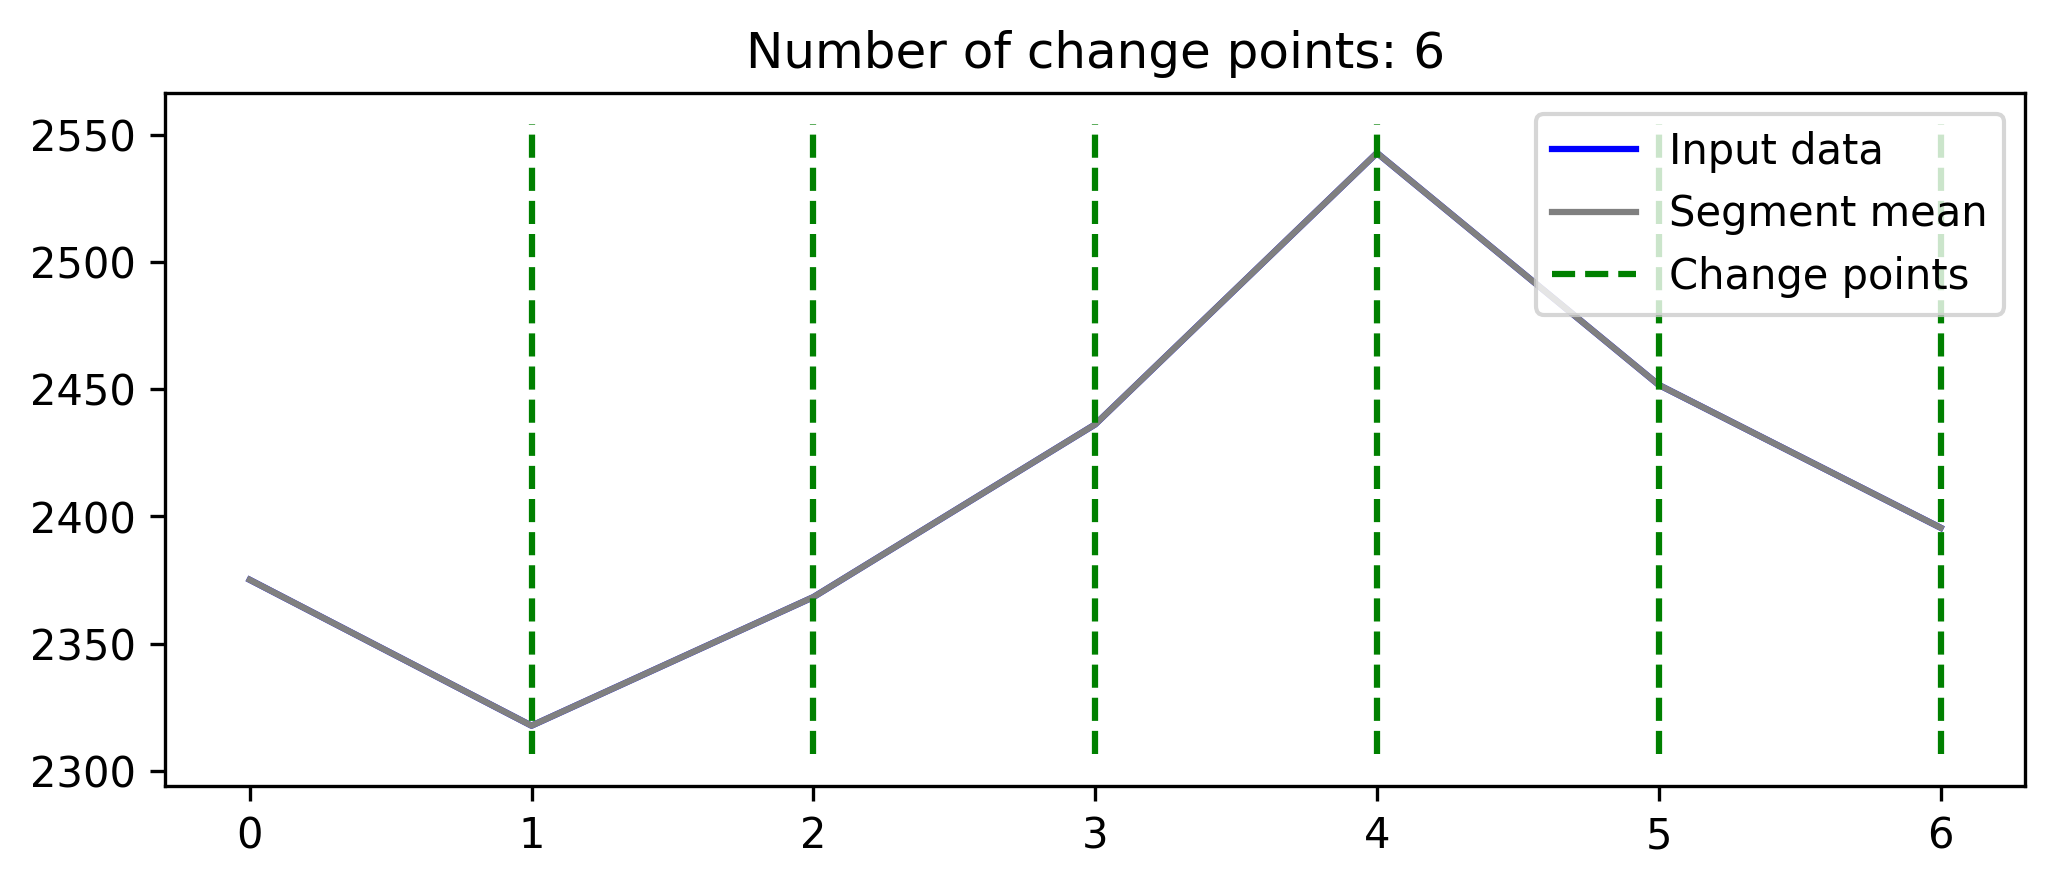

In [245]:
# Calculate change indices based on threshold
threshold = 3
changeIndices = np.abs(np.diff(MF)) > threshold  # Find where the absolute difference between consecutive elements is greater than the threshold
changeIndices = np.insert(changeIndices, 0, False)  # Add False at the beginning to align with MF length

# Create a new figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the original data
ax.plot(MF, color='blue', label='Input data')

# Plot the segment mean (in this case, it's the same as the original data)
ax.plot(MF, color='grey', label='Segment mean')

# Find the indices where changes occur
indices = np.where(changeIndices)[0]
x = np.repeat(indices, 3)  # Repeat each index 3 times to align with y3 for plotting vertical lines

# Get the current y-axis limits
ymin, ymax = ax.get_ylim()
ylim_nan_column = np.array([ymin, ymax, np.nan])  # Array to create vertical lines that span the y-axis

# Count the number of change points
nnz_changeIndices = np.count_nonzero(changeIndices)
print("Number of change points:", nnz_changeIndices)

# Create y-coordinates for change points using tile and flatten
y3 = np.tile(ylim_nan_column, (nnz_changeIndices, 1)).flatten()

# Plot the change points as green vertical dashed lines
ax.plot(x, y3, color='green', linestyle='--', label='Change points')

# Set the title to show the number of change points
ax.set_title(f'Number of change points: {np.count_nonzero(changeIndices)}')

# Add a legend in the upper right corner
ax.legend(loc='upper right')

# Display the plot
plt.show()

#### Detecting changes
- Change detection algorithms
- Limit checking, change in mean
- Cumulative Sum (CUSUM)

##### Limit checking, the most simple detection algorithm

In [246]:
threshold = 30
d.printv(threshold)

threshold = 30


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [247]:
alert = MF-MF[0] > threshold
if np.any(alert):
    # Find the first occurrence of True
    first_true_index = np.argmax(alert)

    # Set all elements from the first True to the end to True
    alert[first_true_index:] = True
d.printv(alert)

alert = [False False False  True  True  True  True]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


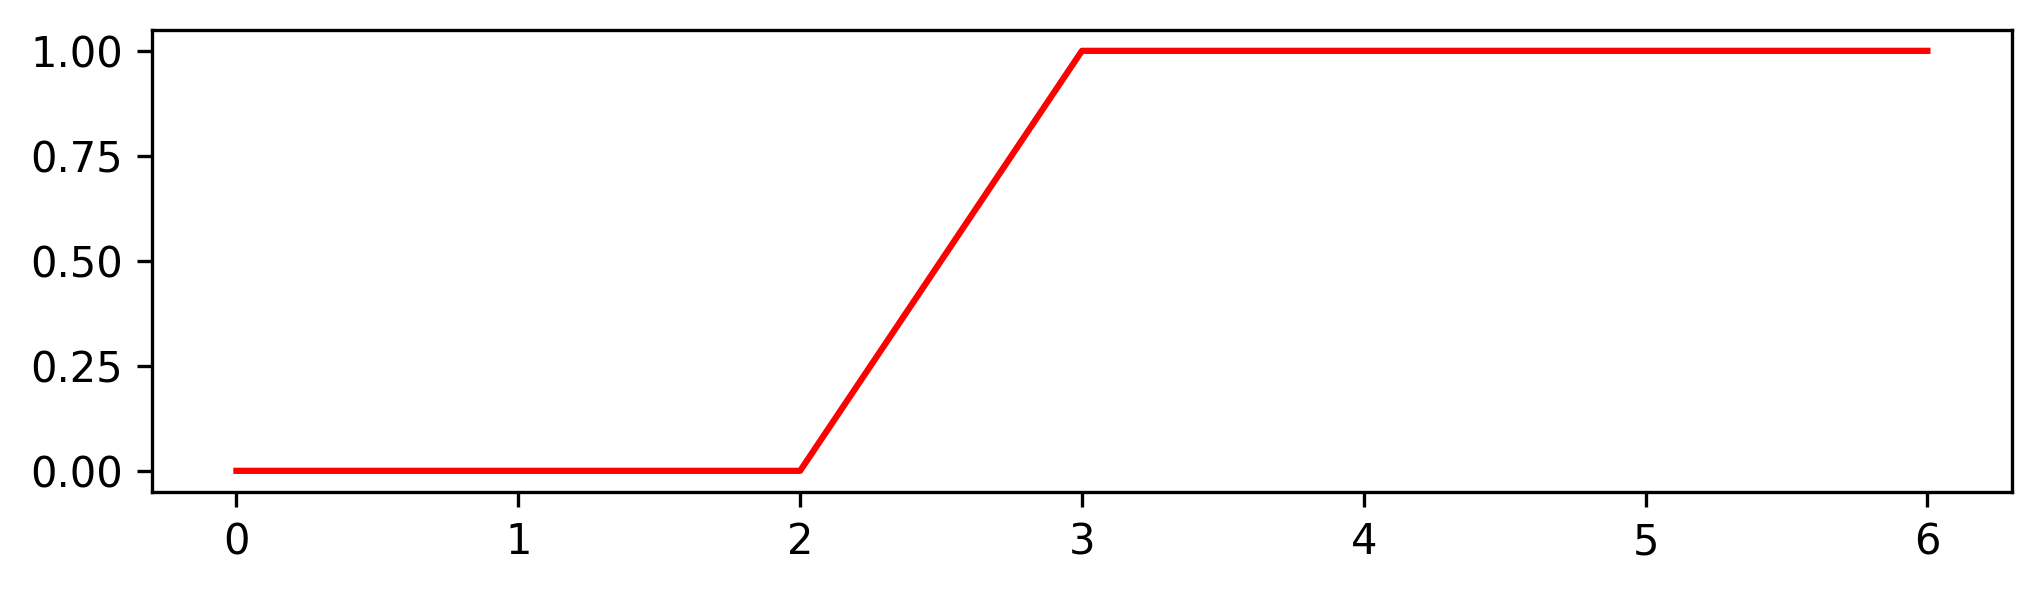

In [248]:
fig = plt.figure()
plt.plot(alert, 'r-')
fig.set_figwidth(8)
plt.show()

##### A different approach would be to take a window of minimum (night) flows, and compare them with the new minimum flow. If it exceeds a precalculated distance, the issue an alert.